# Setup(only on collab)

In [ ]:
# Executa apenas se estiver rodando no Google Colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !git clone https://github.com/alicebarbosam/fraud-detection-kaggle.git
    %cd fraud-detection-kaggle
    !pip install -r requirements.txt

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# Data loading

In [2]:
df = pd.read_csv("../data/train.csv")

df.head()


,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,265519,161919.0,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,7.32,0
1,180306,124477.0,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,2.99,0
2,42665,41191.0,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,175.10,0
3,198724,132624.0,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,6.10,0
4,82326,59359.0,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,86.10,0


# Overview of dataset

In [4]:
print("Shape:", df.shape)
df.info()
df.describe()


Shape: (227845, 32)
<class 'pandas.DataFrame'>
RangeIndex: 227845 entries, 0 to 227844
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      227845 non-null  int64  
 1   Time    227845 non-null  float64
 2   V1      227845 non-null  float64
 3   V2      227845 non-null  float64
 4   V3      227845 non-null  float64
 5   V4      227845 non-null  float64
 6   V5      227845 non-null  float64
 7   V6      227845 non-null  float64
 8   V7      227845 non-null  float64
 9   V8      227845 non-null  float64
 10  V9      227845 non-null  float64
 11  V10     227845 non-null  float64
 12  V11     227845 non-null  float64
 13  V12     227845 non-null  float64
 14  V13     227845 non-null  float64
 15  V14     227845 non-null  float64
 16  V15     227845 non-null  float64
 17  V16     227845 non-null  float64
 18  V17     227845 non-null  float64
 19  V18     227845 non-null  float64
 20  V19     227845 non-null  float64
 21  V

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,142516.559508,94885.093704,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,...,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,88.176298,0.001729
std,82225.135238,47488.415034,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,...,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,250.722602,0.041548
min,1.000000,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,71255.000000,54228.000000,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,...,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,5.640000,0.000000
50%,142583.000000,84805.000000,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,...,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,22.000000,0.000000
75%,213708.000000,139364.000000,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,...,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,77.490000,0.000000
max,284807.000000,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,...,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,25691.160000,1.000000


In [17]:
df.shape

(227845, 32)

In [18]:
df.columns

Index(['id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='str')

In [22]:
df.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [31]:
df.dtypes.value_counts()

float64    30
int64       2
Name: count, dtype: int64

In [29]:
class_counts = df["Class"].value_counts(normalize=True) * 100

print(class_counts)


Class
0    99.827075
1     0.172925
Name: proportion, dtype: float64


#dataset sem valores faltantes e features anonimas, extremamente desbalanceado com 0.17% fraudes e 99.83% não fraudes e sem valores categoricos - nao precisa de one hot encoding

In [24]:
df.corr()["Class"].sort_values()

V17      -0.321937
V14      -0.301054
V12      -0.259989
V10      -0.217894
V3       -0.194135
V16      -0.193826
V7       -0.186184
V18      -0.108732
V1       -0.100041
V9       -0.098247
V5       -0.093578
V6       -0.043334
Time     -0.010564
id       -0.009976
V24      -0.007483
V13      -0.005861
V15      -0.005705
V23      -0.004169
V25       0.001618
V22       0.002926
V26       0.004119
Amount    0.006211
V28       0.009810
V27       0.016034
V20       0.019385
V8        0.020552
V19       0.032380
V21       0.035588
V2        0.090586
V4        0.135014
V11       0.153709
Class     1.000000
Name: Class, dtype: float64

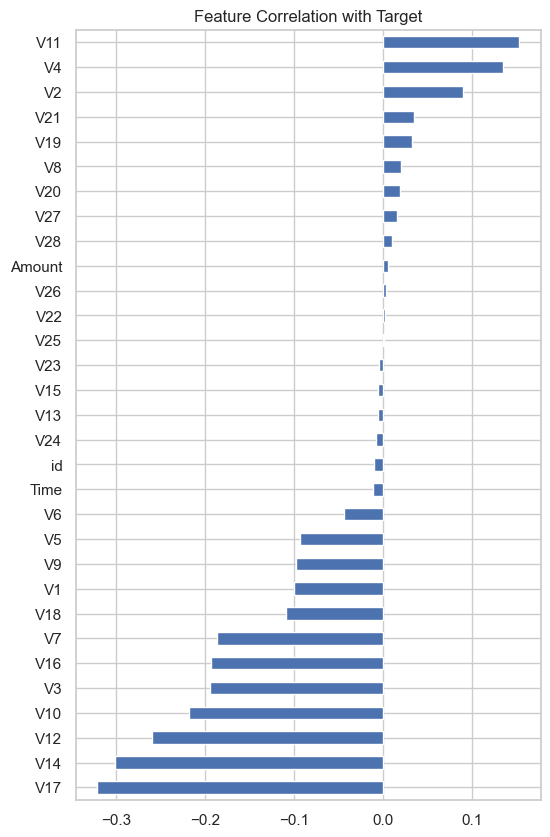

In [25]:
corr_class = df.corr()["Class"].drop("Class").sort_values()

plt.figure(figsize=(6,10))
corr_class.plot(kind="barh")
plt.title("Feature Correlation with Target")
plt.show()


#Aumento de features como V11 e V4 parecem estar relacionadas com aumento da chance de fraude, enquanto o aumento de features como V17, V14, V12 e V10 parecem estar relacionados a diminuiçao da chance de fraude

# Feature distributions

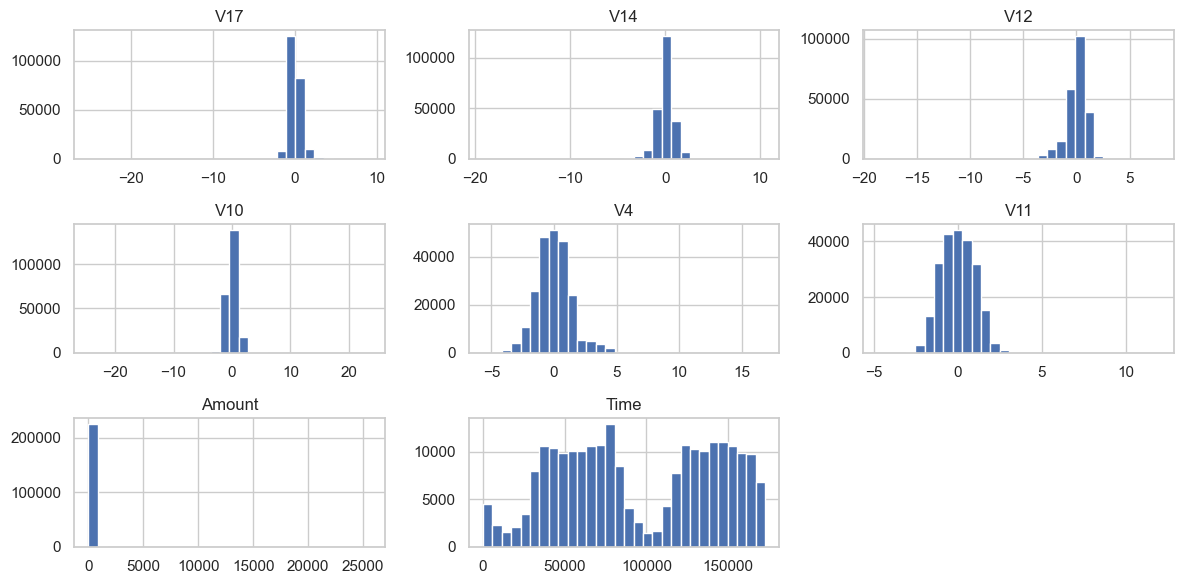

In [27]:
numeric_cols = ["V17","V14","V12","V10", "V4", "V11" ,"Amount", "Time"]
#escolhidas de acordo com a feature correlation que eu fiz 
df[numeric_cols].hist(figsize=(12,6), bins=30)
plt.tight_layout()
plt.show()



#As features V17 V14 V12  V10  V4 e V11 apresentam distribuições aproximadamente simétricas e centradas próximas de zero, que é esperado em variáveis derivadas de PCA, a feature amount apresenta forte assimetria na direita, com grande concentração de valores baixos e poucos valores extremos elevados, a feature time não segue distribuição normal e evidencia padrões temporais não uniformes


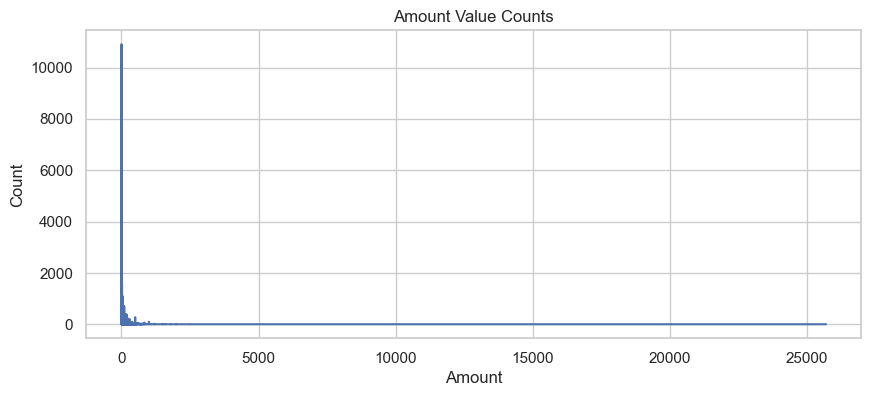

In [10]:
amount_counts = df["Amount"].value_counts().sort_index()

plt.figure(figsize=(10,4))
plt.plot(amount_counts.index, amount_counts.values)
plt.title("Amount Value Counts")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()


#muitas transacoes com valores pequenos e pouquissimas com valores altos, outliers raros

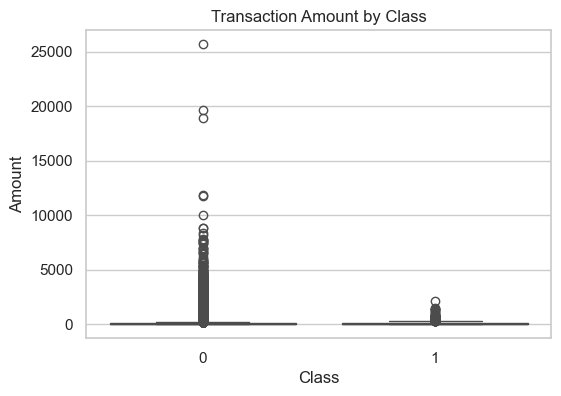

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Class", y="Amount", data=df)
plt.title("Transaction Amount by Class")
plt.show()


#a maioria das fraudes nao esta associada a valores de transacao altos, parece estar mais associada a valores pequenos

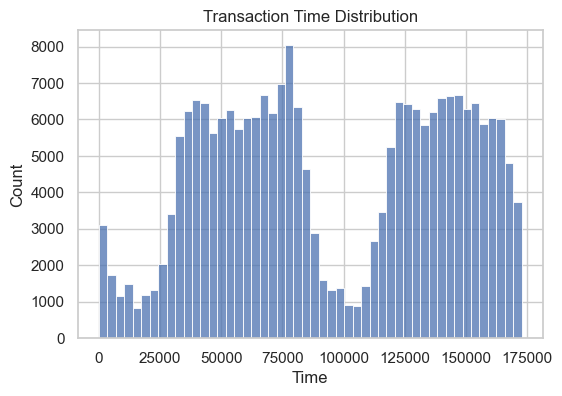

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["Time"], bins=50)
plt.title("Transaction Time Distribution")
plt.show()


#as transacoes parecem ser divididas em picos de periodos mais ativos e periodos de queda(provavelmente relacionado a horario entre dia e noite)

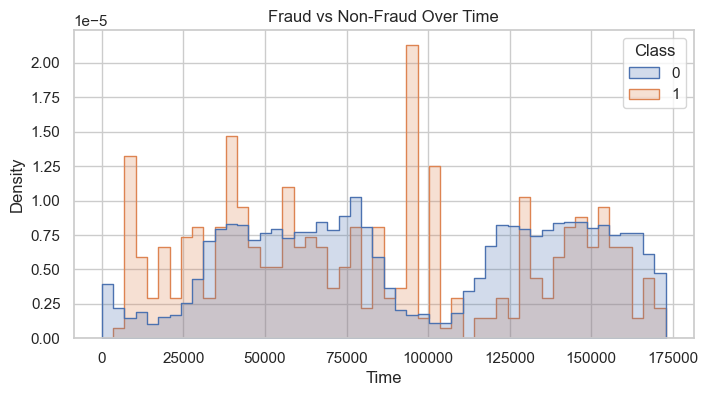

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="Time", hue="Class", bins=50, element="step", stat="density", common_norm=False)
plt.title("Fraud vs Non-Fraud Over Time")
plt.show()


#As fraudes não tem uma distribuição uniforme e parecem estar ter picos mais presentes em periodos de menor atividade de transações

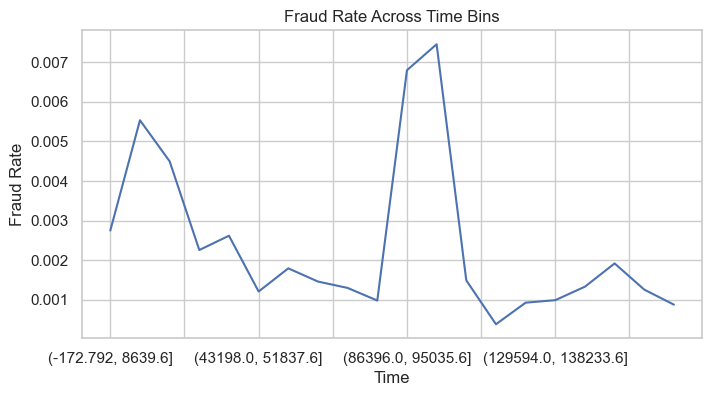

In [14]:
time_bins = pd.cut(df["Time"], bins=20)

fraud_rate = df.groupby(time_bins)["Class"].mean()

plt.figure(figsize=(8,4))
fraud_rate.plot()
plt.title("Fraud Rate Across Time Bins")
plt.ylabel("Fraud Rate")
plt.show()
